In [1]:
import pandas as pd, numpy as np
from skimage import io

In [2]:
data = pd.read_csv('https://d1p17r2m4rzlbo.cloudfront.net/wp-content/uploads/2017/04/a943287.csv')

In [3]:
data_male = data[data['please_select_the_gender_of_the_person_in_the_picture']=="male"].reset_index(drop='index')
data_female = data[data['please_select_the_gender_of_the_person_in_the_picture']=="female"].reset_index(drop='index')
final_data = pd.concat([data_male[:1000],data_female[:1000]],axis=0).reset_index(drop='index')

In [4]:
final_data.loc[1200]

_unit_id                                                                                                   1023135686
_golden                                                                                                         False
_unit_state                                                                                                 finalized
_trusted_judgments                                                                                                  1
_last_judgment_at                                                                                  8/19/2016 22:31:27
please_select_the_gender_of_the_person_in_the_picture                                                          female
please_select_the_gender_of_the_person_in_the_picture:confidence                                                    1
image_url                                                           https://d1qb2nb5cznatu.cloudfront.net/users/29...
please_select_the_gender_of_the_person_in_the_picture_go

# Scenario 1: Big images

In [5]:
x = []
y = []
for i in range(final_data.shape[0]):
  if(i%100==0):
    print(i)
  try:
    image = io.imread(final_data.loc[i]['image_url'])
    if(image.shape==(300,300,3)):
      x.append(image)
      y.append(final_data.loc[i]['please_select_the_gender_of_the_person_in_the_picture'])
  except:
    continue

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900


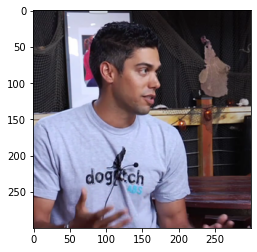

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x[2])

In [35]:
x2 = []
y2 = []
for i in range(len(x)):
  x2.append(x[i])
  img_label = np.where(y[i]=="male",1,0)
  y2.append(img_label)

In [36]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential

In [37]:
x2 = np.array(x2)
x2 = x2.reshape(x2.shape[0],x2.shape[1],x2.shape[2],3)

In [38]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',input_shape=(300,300,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(512, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 298, 298, 64)      1792      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 149, 149, 64)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 149, 149, 128)     73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 74, 74, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 74, 74, 256)       295168    
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 37, 37, 256)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 37, 37, 512)      

In [39]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [40]:
X = np.array(x2)/255
Y = np.array(y2)

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, random_state=42)

In [42]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1568, 300, 300, 3) (175, 300, 300, 3) (1568,) (175,)


In [43]:
np.max(X_train)

1.0

In [44]:
history = model.fit(X_train, y_train, batch_size=32,epochs=10,verbose=1,validation_data = (X_test, y_test))

Train on 1568 samples, validate on 175 samples
Epoch 1/10
1568/1568 [==============================] - 14s 9ms/step - loss: 0.9439 - accuracy: 0.5115 - val_loss: 0.6927 - val_accuracy: 0.4800
Epoch 2/10
1568/1568 [==============================] - 13s 8ms/step - loss: 0.6909 - accuracy: 0.5561 - val_loss: 0.6825 - val_accuracy: 0.5657
Epoch 3/10
1568/1568 [==============================] - 13s 8ms/step - loss: 0.6822 - accuracy: 0.5797 - val_loss: 0.6884 - val_accuracy: 0.5086
Epoch 4/10
1568/1568 [==============================] - 13s 8ms/step - loss: 0.6572 - accuracy: 0.6116 - val_loss: 0.6090 - val_accuracy: 0.6686
Epoch 5/10
1568/1568 [==============================] - 13s 8ms/step - loss: 0.6252 - accuracy: 0.6448 - val_loss: 0.5895 - val_accuracy: 0.7429
Epoch 6/10
1568/1568 [==============================] - 13s 8ms/step - loss: 0.5969 - accuracy: 0.6805 - val_loss: 0.5650 - val_accuracy: 0.7143
Epoch 7/10
1568/1568 [==============================] - 13s 8ms/step - loss: 0.5519

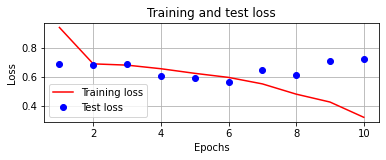

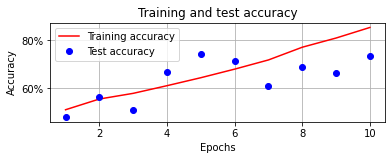

In [45]:

import matplotlib.pyplot as plt
%matplotlib inline
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(val_loss_values) + 1)

plt.subplot(211)
plt.plot(epochs, history.history['loss'], 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'bo', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, history.history['accuracy'], 'r', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'bo', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

In [46]:
np.max(val_acc_values), np.average(val_acc_values)

(0.7428571581840515, 0.6382857114076614)

# Scenario 2: Small images

In [47]:
import cv2
x2 = []
y2 = []
for i in range(len(x)):
  img = cv2.resize(x[i],(50,50))
  x2.append(img)
  img_label = np.where(y[i]=="male",1,0)
  y2.append(img_label)

In [48]:
x2 = np.array(x2)
x2 = x2.reshape(x2.shape[0],x2.shape[1],x2.shape[2],3)

In [49]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',input_shape=(50,50,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(512, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 48, 48, 64)        1792      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 6, 6, 512)        

In [53]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

X = np.array(x2)/255
Y = np.array(y2)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, random_state=42)

history = model.fit(X_train, y_train, batch_size=32,epochs=10,verbose=1,validation_data = (X_test, y_test))

Train on 1568 samples, validate on 175 samples
Epoch 1/10
1568/1568 [==============================] - 1s 535us/step - loss: 0.2293 - accuracy: 0.9088 - val_loss: 0.6460 - val_accuracy: 0.7429
Epoch 2/10
1568/1568 [==============================] - 1s 419us/step - loss: 0.1573 - accuracy: 0.9432 - val_loss: 0.7673 - val_accuracy: 0.7486
Epoch 3/10
1568/1568 [==============================] - 1s 419us/step - loss: 0.0906 - accuracy: 0.9624 - val_loss: 0.8264 - val_accuracy: 0.7714
Epoch 4/10
1568/1568 [==============================] - 1s 408us/step - loss: 0.0702 - accuracy: 0.9751 - val_loss: 1.0184 - val_accuracy: 0.7714
Epoch 5/10
1568/1568 [==============================] - 1s 408us/step - loss: 0.0660 - accuracy: 0.9783 - val_loss: 0.9704 - val_accuracy: 0.7657
Epoch 6/10
1568/1568 [==============================] - 1s 407us/step - loss: 0.0332 - accuracy: 0.9911 - val_loss: 1.1446 - val_accuracy: 0.7143
Epoch 7/10
1568/1568 [==============================] - 1s 411us/step - loss:

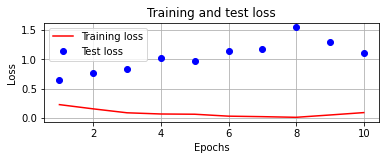

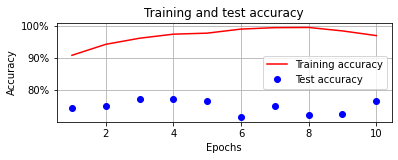

In [54]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(val_loss_values) + 1)

plt.subplot(211)
plt.plot(epochs, history.history['loss'], 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'bo', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, history.history['accuracy'], 'r', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'bo', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

In [55]:
np.max(val_acc_values), np.average(val_acc_values)

(0.7714285850524902, 0.747428584098816)

# Aggressive pooling on big images

In [56]:
x2 = []
y2 = []
for i in range(len(x)):
  x2.append(x[i])
  img_label = np.where(y[i]=="male",1,0)
  y2.append(img_label)

In [57]:
x2 = np.array(x2)
x2 = x2.reshape(x2.shape[0],x2.shape[1],x2.shape[2],3)

In [58]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',input_shape=(300,300,3)))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(512, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 298, 298, 64)      1792      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 99, 99, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 99, 99, 128)       73856     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 33, 33, 128)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 33, 33, 256)       295168    
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 11, 11, 256)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 11, 11, 512)      

In [59]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

X = np.array(x2)/255
Y = np.array(y2)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, random_state=42)

history = model.fit(X_train, y_train, batch_size=32,epochs=10,verbose=1,validation_data = (X_test, y_test))

Train on 1568 samples, validate on 175 samples
Epoch 1/10
1568/1568 [==============================] - 8s 5ms/step - loss: 0.7211 - accuracy: 0.5172 - val_loss: 0.6973 - val_accuracy: 0.4800
Epoch 2/10
1568/1568 [==============================] - 8s 5ms/step - loss: 0.6921 - accuracy: 0.5395 - val_loss: 0.6923 - val_accuracy: 0.4800
Epoch 3/10
1568/1568 [==============================] - 8s 5ms/step - loss: 0.6671 - accuracy: 0.6078 - val_loss: 0.7007 - val_accuracy: 0.6286
Epoch 4/10
1568/1568 [==============================] - 8s 5ms/step - loss: 0.6330 - accuracy: 0.6709 - val_loss: 0.6331 - val_accuracy: 0.6571
Epoch 5/10
1568/1568 [==============================] - 8s 5ms/step - loss: 0.6196 - accuracy: 0.6677 - val_loss: 0.6017 - val_accuracy: 0.6514
Epoch 6/10
1568/1568 [==============================] - 8s 5ms/step - loss: 0.5820 - accuracy: 0.6964 - val_loss: 0.5920 - val_accuracy: 0.6629
Epoch 7/10
1568/1568 [==============================] - 8s 5ms/step - loss: 0.5419 - accu

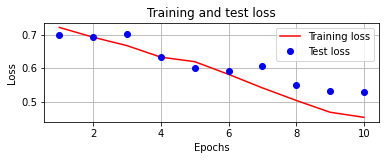

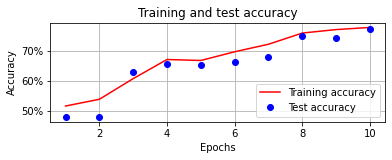

In [60]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(val_loss_values) + 1)

plt.subplot(211)
plt.plot(epochs, history.history['loss'], 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'bo', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, history.history['accuracy'], 'r', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'bo', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

In [61]:
np.max(val_acc_values), np.average(val_acc_values)

(0.7714285850524902, 0.6502857208251953)

# VGG16 architecture

In [62]:
from keras.applications import vgg16
from keras.utils.vis_utils import plot_model
from keras.applications.vgg16 import preprocess_input
vgg16_model = vgg16.VGG16(include_top=False, weights='imagenet',input_shape=(300,300,3))

In [63]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 300, 300, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 300, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 300, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 150, 150, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 150, 150, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 150, 150, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 75, 75, 128)       0     

In [64]:
import cv2
x2_vgg16 = []
for i in range(len(x)):
    if(i%100 == 0):
      print(i)
    img = x[i]
    img = preprocess_input(img.reshape(1,300,300,3))
    img_new = vgg16_model.predict(img.reshape(1,300,300,3))
    x2_vgg16.append(img_new)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700


In [65]:
x2_vgg16 = np.array(x2_vgg16)
x2_vgg16.shape

(1743, 1, 9, 9, 512)

In [66]:
x2_vgg16= x2_vgg16.reshape(x2_vgg16.shape[0],x2_vgg16.shape[2],x2_vgg16.shape[3],x2_vgg16.shape[4])
x2_vgg16.shape

(1743, 9, 9, 512)

In [67]:
Y = np.array(y2)

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x2_vgg16,Y, test_size=0.1, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1568, 9, 9, 512) (175, 9, 9, 512) (1568,) (175,)


In [69]:
np.max(X_train)

691.8677

In [70]:
model_vgg16 = Sequential()
model_vgg16.add(Conv2D(512, kernel_size=(3, 3), activation='relu',input_shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3])))
model_vgg16.add(MaxPooling2D(pool_size=(2, 2)))
model_vgg16.add(Flatten())
model_vgg16.add(Dense(512, activation='relu'))
model_vgg16.add(Dropout(0.5))
model_vgg16.add(Dense(1, activation='sigmoid'))
model_vgg16.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 7, 7, 512)         2359808   
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 3, 3, 512)         0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               2359808   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 513       
Total params: 4,720,129
Trainable params: 4,720,129
Non-trainable params: 0
____________________________________________

In [71]:
model_vgg16.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [72]:
np.mean(y_train)

0.48214285714285715

In [73]:
history_vgg16 = model_vgg16.fit(X_train/np.max(X_train), y_train, batch_size=16,epochs=10,verbose=1,
                                validation_data = (X_test/np.max(X_train), y_test))

Train on 1568 samples, validate on 175 samples
Epoch 1/10
1568/1568 [==============================] - 1s 843us/step - loss: 0.3559 - accuracy: 0.8540 - val_loss: 0.2385 - val_accuracy: 0.8857
Epoch 2/10
1568/1568 [==============================] - 1s 656us/step - loss: 0.1289 - accuracy: 0.9560 - val_loss: 0.2199 - val_accuracy: 0.9029
Epoch 3/10
1568/1568 [==============================] - 1s 639us/step - loss: 0.0618 - accuracy: 0.9790 - val_loss: 0.2271 - val_accuracy: 0.9257
Epoch 4/10
1568/1568 [==============================] - 1s 642us/step - loss: 0.0243 - accuracy: 0.9911 - val_loss: 0.3411 - val_accuracy: 0.9029
Epoch 5/10
1568/1568 [==============================] - 1s 625us/step - loss: 0.0075 - accuracy: 0.9981 - val_loss: 0.3009 - val_accuracy: 0.9200
Epoch 6/10
1568/1568 [==============================] - 1s 618us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.3017 - val_accuracy: 0.9143
Epoch 7/10
1568/1568 [==============================] - 1s 632us/step - loss:

In [74]:
history_vgg16 = model_vgg16.fit(X_train/np.max(X_train), y_train, batch_size=16,epochs=10,verbose=1,
                                validation_data = (X_test/np.max(X_train), y_test))

Train on 1568 samples, validate on 175 samples
Epoch 1/10
1568/1568 [==============================] - 1s 717us/step - loss: 2.3460e-04 - accuracy: 1.0000 - val_loss: 0.3238 - val_accuracy: 0.9371
Epoch 2/10
1568/1568 [==============================] - 1s 795us/step - loss: 2.1742e-04 - accuracy: 1.0000 - val_loss: 0.3525 - val_accuracy: 0.9200
Epoch 3/10
1568/1568 [==============================] - 1s 641us/step - loss: 1.3799e-04 - accuracy: 1.0000 - val_loss: 0.3506 - val_accuracy: 0.9314
Epoch 4/10
1568/1568 [==============================] - 1s 634us/step - loss: 1.3800e-04 - accuracy: 1.0000 - val_loss: 0.3432 - val_accuracy: 0.9371
Epoch 5/10
1568/1568 [==============================] - 1s 650us/step - loss: 1.1594e-04 - accuracy: 1.0000 - val_loss: 0.3562 - val_accuracy: 0.9371
Epoch 6/10
1568/1568 [==============================] - 1s 639us/step - loss: 1.3985e-04 - accuracy: 1.0000 - val_loss: 0.3627 - val_accuracy: 0.9371
Epoch 7/10
1568/1568 [==============================]

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(val_loss_values) + 1)

plt.subplot(211)
plt.plot(epochs, history.history['loss'], 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'bo', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, history.history['accuracy'], 'r', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'bo', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

In [76]:
np.max(val_acc_values), np.average(val_acc_values)

(0.7714285850524902, 0.6502857208251953)

# Visualizing the output intermediate layers

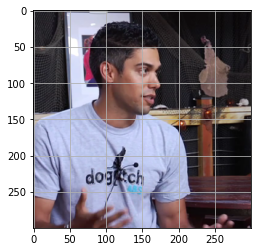

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x[2])
plt.grid('off')

In [78]:
np.max(X_train)

691.8677

In [79]:
from keras.applications.vgg16 import preprocess_input
model_vgg16.predict(vgg16_model.predict(preprocess_input(x[3].reshape(1,300,300,3)))/np.max(X_train))

array([[0.9999956]], dtype=float32)

In [80]:
for layer in vgg16_model.layers:
  print(layer.name)

input_2
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool


In [83]:
from keras import models
activation_model = models.Model(inputs=vgg16_model.input,outputs=vgg16_model.layers[1].output)
activations = activation_model.predict(preprocess_input(x[2].reshape(1,300,300,3)))

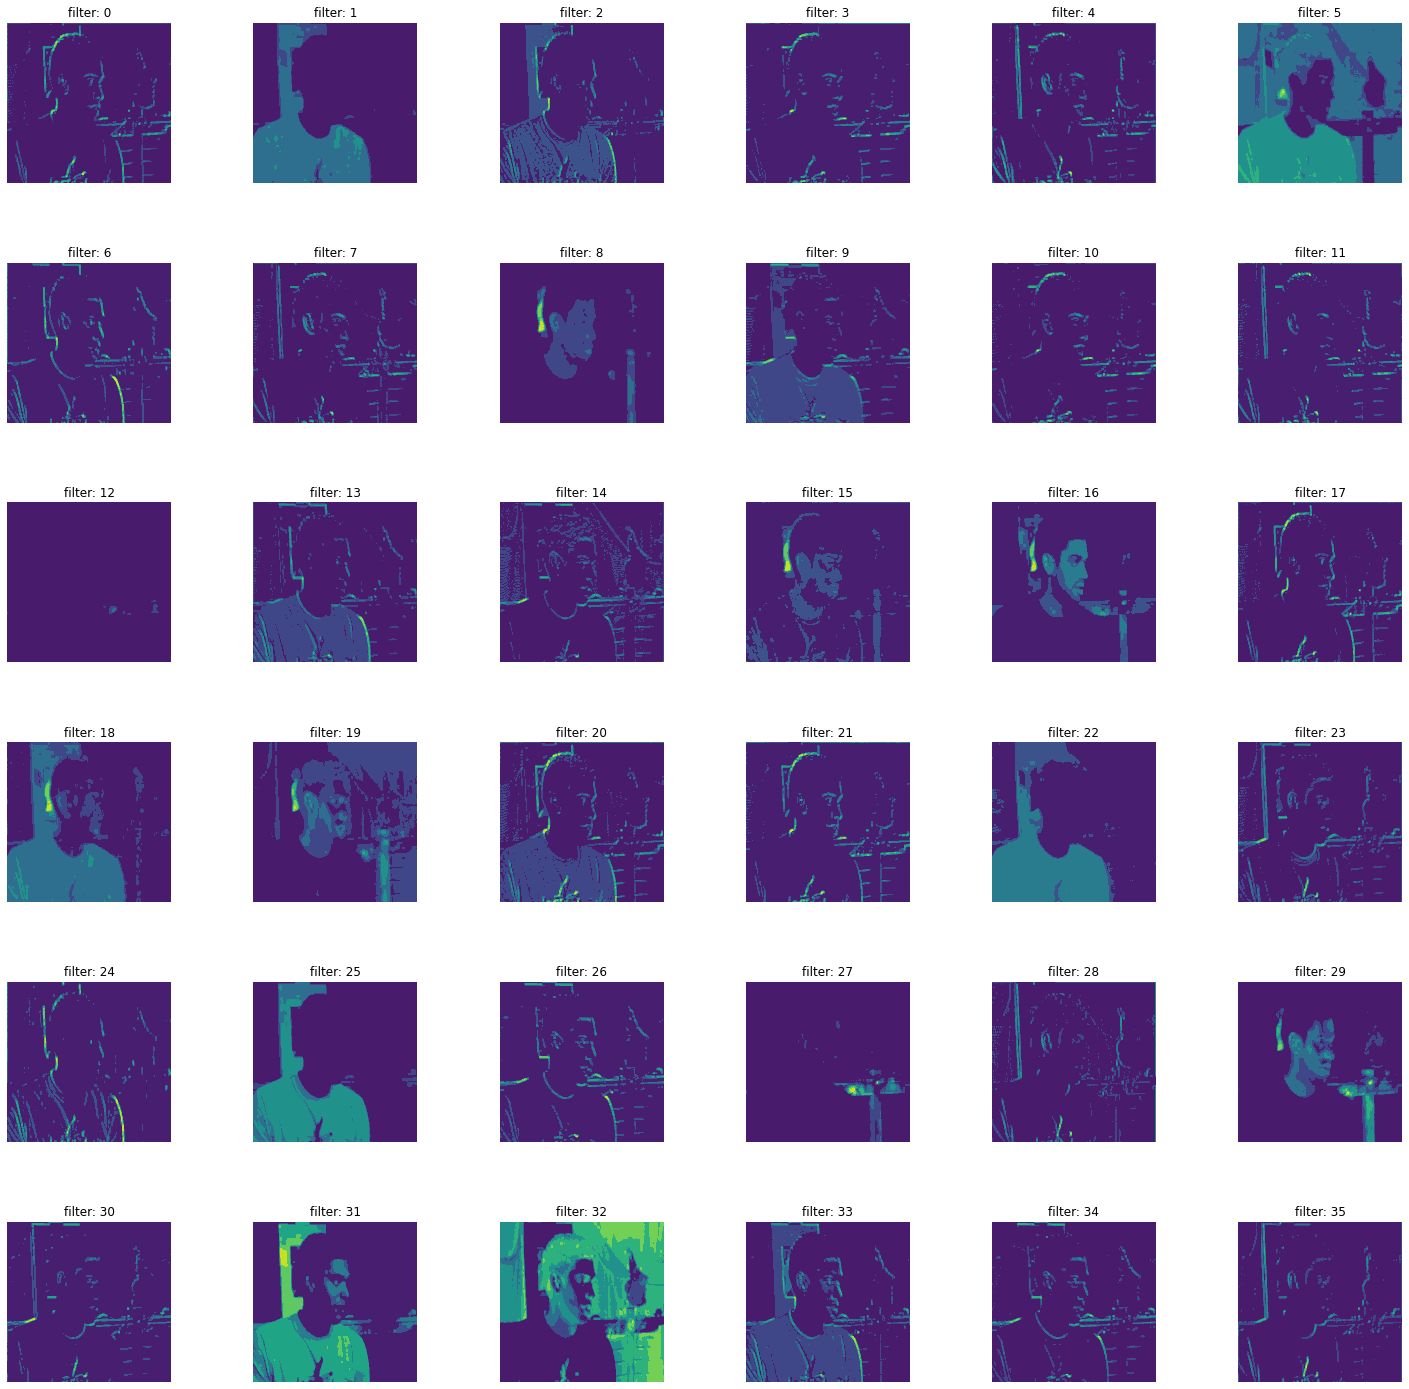

In [85]:
fig, axs = plt.subplots(6, 6, figsize=(25, 25))
fig.subplots_adjust(hspace = .5, wspace=.5)
first_layer_activation = activations[0]
for i in range(6):
  for j in range(6):
    try:
      axs[i,j].set_ylim((224, 0))
      axs[i,j].contourf(first_layer_activation[:,:,((6*i)+j)],6,cmap='viridis')
      axs[i,j].set_title('filter: '+str((6*i)+j))
      axs[i,j].axis('off')
    except:
      continue
            

In [92]:
activation_model = models.Model(inputs=vgg16_model.input,outputs=vgg16_model.layers[1].output)
activations = activation_model.predict(preprocess_input(np.array(x[:36]).reshape(36,300,300,3)))

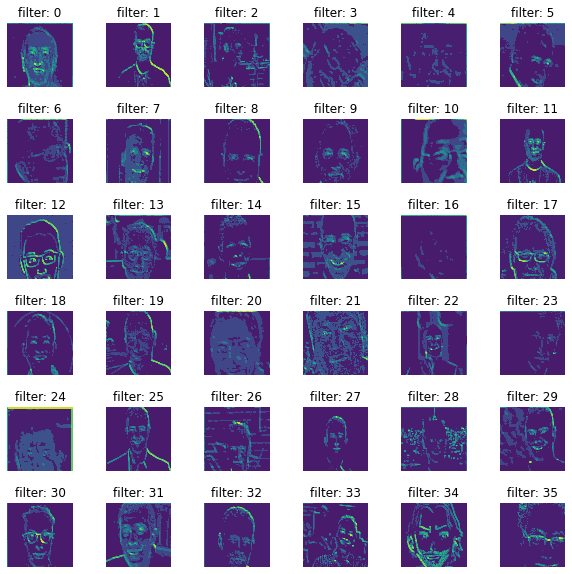

In [94]:
fig, axs = plt.subplots(6, 6, figsize=(10, 10))
fig.subplots_adjust(hspace = .5, wspace=.5)
first_layer_activation = activations
for i in range(6):
  for j in range(6):
    try:
      axs[i,j].set_ylim((224, 0))
      axs[i,j].contourf(first_layer_activation[((6*i)+j),:,:,7],6,cmap='viridis')
      axs[i,j].set_title('filter: '+str((6*i)+j))
      axs[i,j].axis('off')
    except:
      continu

In [95]:
activation_model = models.Model(inputs=vgg16_model.input,outputs=vgg16_model.layers[-1].output)
activations = activation_model.predict(preprocess_input(x[2].reshape(1,300,300,3)))

In [96]:
last_layer_activation.shape

(36, 300, 300, 64)

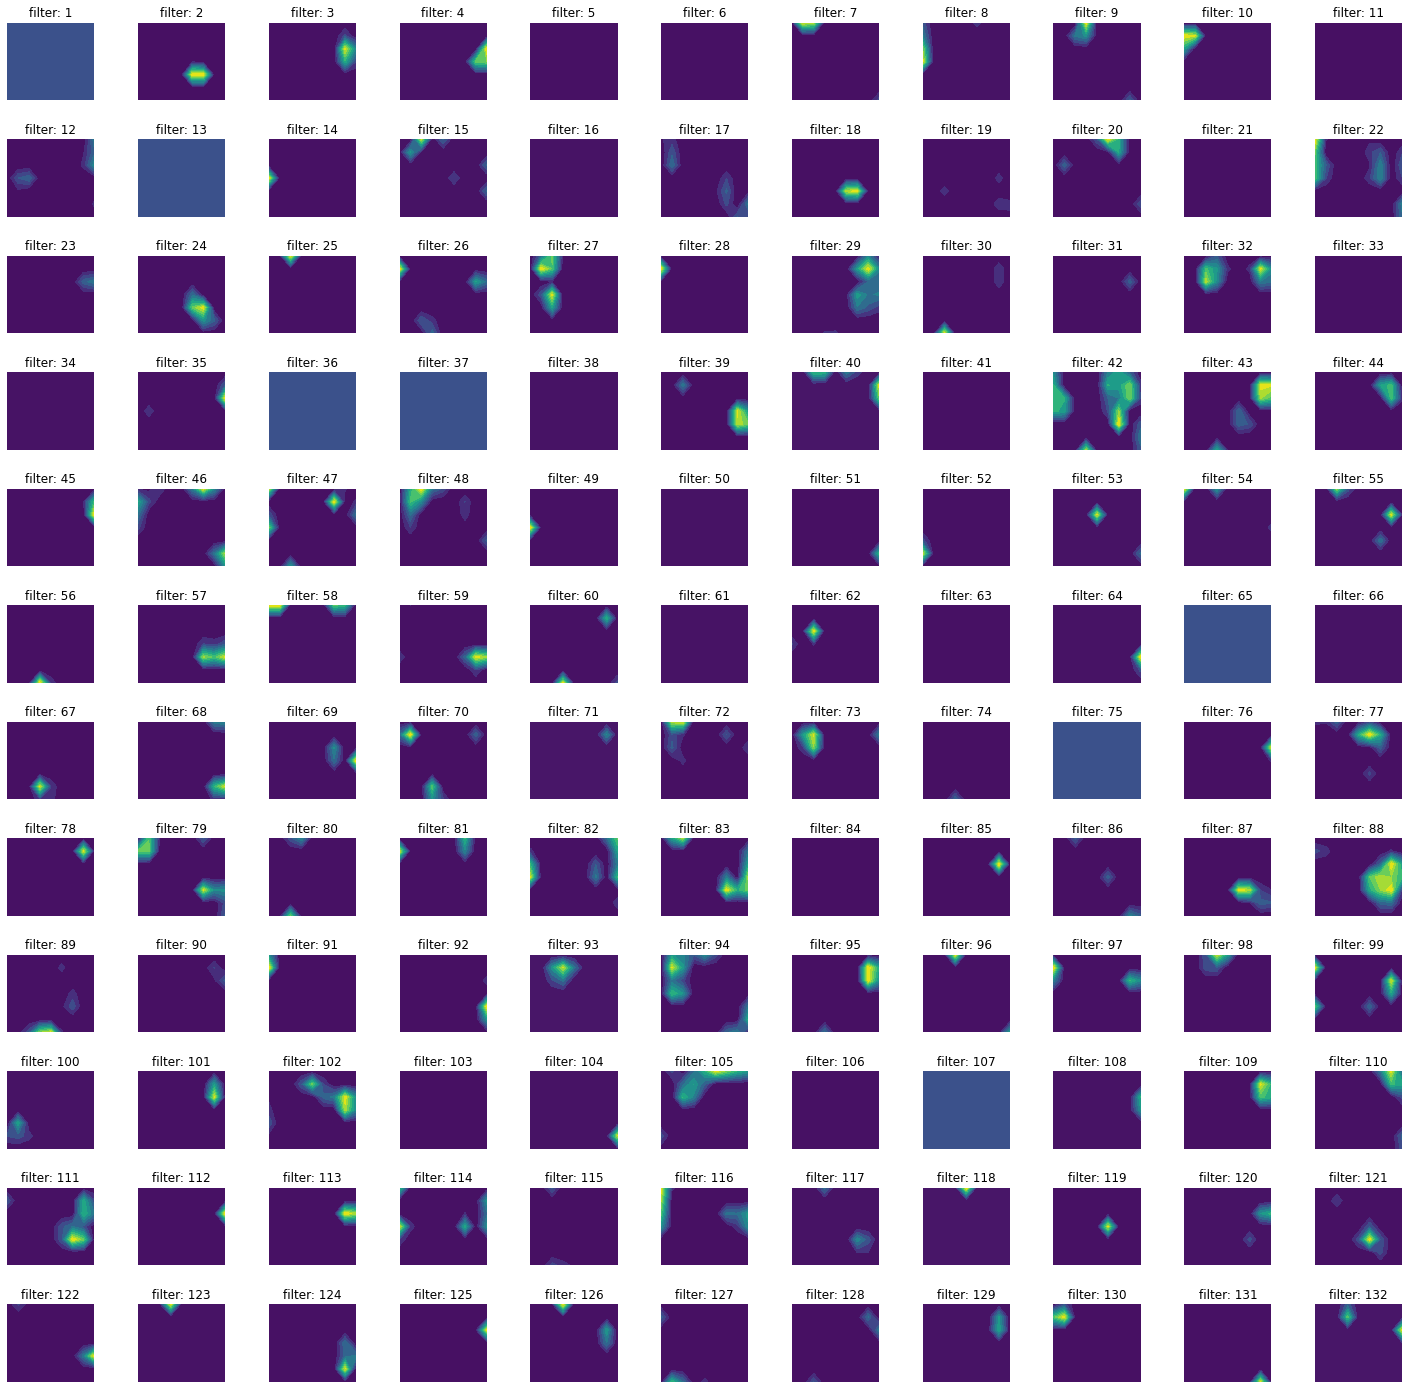

In [98]:
fig, axs = plt.subplots(12, 11, figsize=(25, 25))
fig.subplots_adjust(hspace = .5, wspace=.5)

last_layer_activation = activations
count = 0
for i in range(12):
  for j in range(11):
    try:
      count+=1
      axs[i,j].set_ylim((6, 0))
      axs[i,j].contourf(last_layer_activation[0,:,:,((12*i)+j)],11,cmap='viridis')
      axs[i,j].set_title('filter: '+str(count))
      axs[i,j].axis('off')
    except:
      continue

# Inception v3 architecture

In [99]:
from keras.applications import inception_v3
from keras.applications.inception_v3 import preprocess_input
from keras.utils.vis_utils import plot_model
inception_model = inception_v3.InceptionV3(include_top=False, weights='imagenet',input_shape=(300,300,3))

inception_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 300, 300, 3)  0                                            
__________________________________________________________________________________________________
conv2d_26 (Conv2D)              (None, 149, 149, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_26[0][0]                  
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
_______________________________________________________________________________________

In [100]:
x2 = []
for i in range(len(x)):
    if(i%100 == 0):
      print(i)
    img = x[i]
    img = preprocess_input(img.reshape(1,300,300,3))
    img_new = inception_model.predict(img.reshape(1,300,300,3))
    x2.append(img_new)
	
x2 = np.array(x2)
x2.shape

x2= x2.reshape(x2.shape[0],x2.shape[2],x2.shape[3],x2.shape[4])
x2.shape

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x2,Y, test_size=0.1, random_state=42)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700


In [101]:
model_inception_v3 = Sequential()
model_inception_v3.add(Conv2D(512, kernel_size=(3, 3), activation='relu',input_shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3])))
model_inception_v3.add(MaxPooling2D(pool_size=(2, 2)))
model_inception_v3.add(Flatten())
model_inception_v3.add(Dense(512, activation='relu'))
model_inception_v3.add(Dropout(0.5))
model_inception_v3.add(Dense(1, activation='sigmoid'))
model_inception_v3.summary()

model_inception_v3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history_inception_v3 = model_inception_v3.fit(X_train/np.max(X_train), y_train, batch_size=16,epochs=10,verbose=1,
                                              validation_data = (X_test/np.max(X_train), y_test))

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_120 (Conv2D)          (None, 6, 6, 512)         9437696   
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 3, 3, 512)         0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)               2359808   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 513       
Total params: 11,798,017
Trainable params: 11,798,017
Non-trainable params: 0
__________________________________________

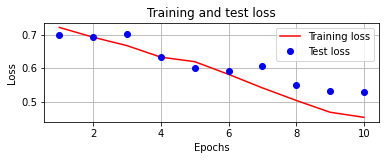

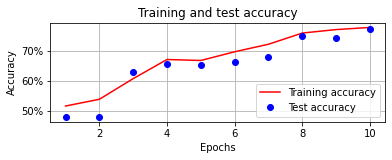

In [102]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(val_loss_values) + 1)

plt.subplot(211)
plt.plot(epochs, history.history['loss'], 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'bo', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, history.history['accuracy'], 'r', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'bo', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

In [103]:
np.max(val_acc_values), np.average(val_acc_values)

(0.7714285850524902, 0.6502857208251953)

# ResNet 50 architecture

In [104]:
from keras.applications import resnet50
from keras.applications.resnet50 import preprocess_input
resnet50_model = resnet50.ResNet50(include_top=False, weights='imagenet',input_shape=(300,300,3))

resnet50_model.summary()

C:\Users\fayca\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 300, 300, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 306, 306, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 150, 150, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 150, 150, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [105]:
x2 = []
for i in range(len(x)):
    if(i%100 == 0):
      print(i)
    img = x[i]
    img = preprocess_input(img.reshape(1,300,300,3))
    img_new = resnet50_model.predict(img.reshape(1,300,300,3))
    x2.append(img_new)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700


In [106]:
x2 = np.array(x2)
x2.shape

(1743, 1, 10, 10, 2048)

In [107]:
x2= x2.reshape(x2.shape[0],x2.shape[2],x2.shape[3],x2.shape[4])
x2.shape

(1743, 10, 10, 2048)

In [108]:
Y = np.array(y2)

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x2,Y, test_size=0.1, random_state=42)

In [110]:
model_resnet50 = Sequential()
model_resnet50.add(Conv2D(512, kernel_size=(3, 3), activation='relu',input_shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3])))
model_resnet50.add(MaxPooling2D(pool_size=(2, 2)))
model_resnet50.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model_resnet50.add(MaxPooling2D(pool_size=(2, 2)))
model_resnet50.add(Flatten())
model_resnet50.add(Dense(512, activation='relu'))
model_resnet50.add(Dropout(0.5))
model_resnet50.add(Dense(1, activation='sigmoid'))
model_resnet50.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_121 (Conv2D)          (None, 8, 8, 512)         9437696   
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 4, 4, 512)         0         
_________________________________________________________________
conv2d_122 (Conv2D)          (None, 2, 2, 512)         2359808   
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 1, 1, 512)         0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)              

In [111]:
model_resnet50.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [112]:
np.max(X_train)

119.07667

In [113]:
history_resnet50 = model_resnet50.fit(X_train/np.max(X_train), y_train, batch_size=32,epochs=10,verbose=1,
                                      validation_data = (X_test/np.max(X_train), y_test))

Train on 1568 samples, validate on 175 samples
Epoch 1/10
1568/1568 [==============================] - 3s 2ms/step - loss: 0.2920 - accuracy: 0.8718 - val_loss: 0.2069 - val_accuracy: 0.9257
Epoch 2/10
1568/1568 [==============================] - 2s 1ms/step - loss: 0.1428 - accuracy: 0.9496 - val_loss: 0.2089 - val_accuracy: 0.9314
Epoch 3/10
1568/1568 [==============================] - 2s 1ms/step - loss: 0.0702 - accuracy: 0.9777 - val_loss: 0.2880 - val_accuracy: 0.9200
Epoch 4/10
1568/1568 [==============================] - 2s 1ms/step - loss: 0.0472 - accuracy: 0.9860 - val_loss: 0.2663 - val_accuracy: 0.9200
Epoch 5/10
1568/1568 [==============================] - 2s 1ms/step - loss: 0.0207 - accuracy: 0.9923 - val_loss: 0.3599 - val_accuracy: 0.9200
Epoch 6/10
1568/1568 [==============================] - 2s 1ms/step - loss: 0.0067 - accuracy: 0.9981 - val_loss: 0.6167 - val_accuracy: 0.9200
Epoch 7/10
1568/1568 [==============================] - 2s 1ms/step - loss: 0.0023 - accu

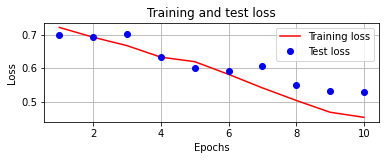

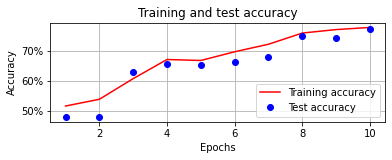

In [114]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(val_loss_values) + 1)

plt.subplot(211)
plt.plot(epochs, history.history['loss'], 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'bo', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, history.history['accuracy'], 'r', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'bo', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

In [115]:
np.max(val_acc_values), np.average(val_acc_values)

(0.7714285850524902, 0.6502857208251953)